In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Data2/target_gwanak.csv')
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,점포수,총매출액,점포매출액
0,2014,1,A,골목상권,11620,관악구,11620525,보라매동,1000804,당곡길,71,35082548052,4.941204e+08
1,2014,1,A,골목상권,11620,관악구,11620525,보라매동,1000811,봉천로13길,1,144068088,1.440681e+08
2,2014,1,A,골목상권,11620,관악구,11620545,청림동,1000783,관악로30길,36,6441883635,1.789412e+08
3,2014,1,A,골목상권,11620,관악구,11620545,청림동,1000835,청림3길,20,2556825805,1.278413e+08
4,2014,1,A,골목상권,11620,관악구,11620565,성현동,1000786,구암길,15,486805533,3.245370e+07


In [3]:
data.shape

1984 / 32

62.0

### 32개 있는 데이터만 고르기

In [4]:
from module.outlier import thirtyTwoTwo

data=thirtyTwoTwo(data)
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,점포수,총매출액,점포매출액
0,2014,1,A,골목상권,11620,관악구,11620525,보라매동,1000804,당곡길,71,35082548052,4.941204e+08
1,2014,1,A,골목상권,11620,관악구,11620525,보라매동,1000811,봉천로13길,1,144068088,1.440681e+08
2,2014,1,A,골목상권,11620,관악구,11620545,청림동,1000783,관악로30길,36,6441883635,1.789412e+08
3,2014,1,A,골목상권,11620,관악구,11620545,청림동,1000835,청림3길,20,2556825805,1.278413e+08
4,2014,1,A,골목상권,11620,관악구,11620565,성현동,1000786,구암길,15,486805533,3.245370e+07


In [5]:
data.shape

(1984, 13)

In [6]:
data.sort_values(by=['기준_년_코드','기준_분기_코드'],inplace=True)
data

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,점포수,총매출액,점포매출액
0,2014,1,A,골목상권,11620,관악구,11620525,보라매동,1000804,당곡길,71,35082548052,4.941204e+08
1,2014,1,A,골목상권,11620,관악구,11620525,보라매동,1000811,봉천로13길,1,144068088,1.440681e+08
2,2014,1,A,골목상권,11620,관악구,11620545,청림동,1000783,관악로30길,36,6441883635,1.789412e+08
3,2014,1,A,골목상권,11620,관악구,11620545,청림동,1000835,청림3길,20,2556825805,1.278413e+08
4,2014,1,A,골목상권,11620,관악구,11620565,성현동,1000786,구암길,15,486805533,3.245370e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,2021,4,A,골목상권,11620,관악구,11620775,난곡동,1000789,난곡로24길,8,422180468,5.277256e+07
1980,2021,4,A,골목상권,11620,관악구,11620775,난곡동,1000790,난곡로26길,18,1904175594,1.057875e+08
1981,2021,4,A,골목상권,11620,관악구,11620775,난곡동,1000791,난곡로34길,23,3521683756,1.531167e+08
1982,2021,4,A,골목상권,11620,관악구,11620775,난곡동,1000808,법원단지9길,1,24107265,2.410726e+07


### 서비스 업종별로의 분포 보기

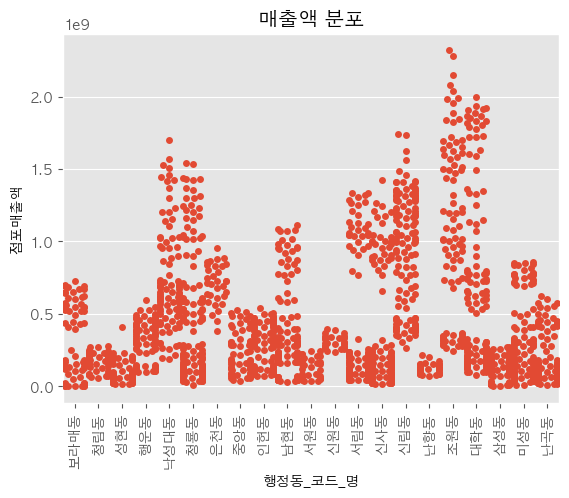

In [7]:
plt.style.use('ggplot')

# for service in data['상권_코드_명'].unique():
#     test=data[data['상권_코드_명'] == service]
test = data
test.sort_values(by=['기준_년_코드','기준_분기_코드'],inplace=True)
test.reset_index(inplace=True,drop=True)

sns.swarmplot(
    x='행정동_코드_명',
    y='점포매출액',
    data=test
)

plt.title(f'매출액 분포')

plt.xticks(rotation=90)

plt.show()

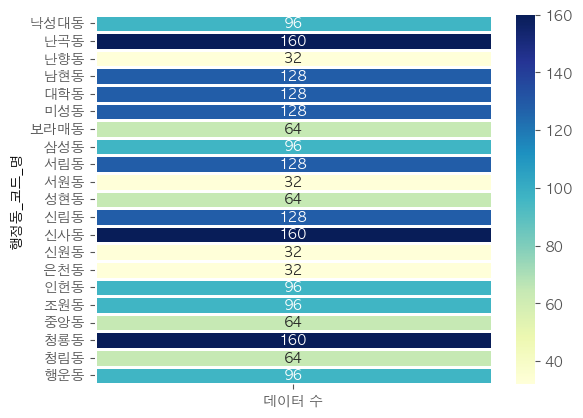

In [12]:
table=data.pivot_table(index=['행정동_코드_명'],aggfunc='size')
sns.heatmap(
	pd.DataFrame(table),
    annot=True,
	fmt='d',
	cmap='YlGnBu',
	linewidth=2,
	cbar=True
)



plt.xticks(labels=['데이터 수'],ticks=[0.5])

# plt.xticks(labels=['데이터 수'],ticks=[0.5])

plt.show()

### 분포가 어느정도 나뉘는 것을 확인했다. 이걸로 하면 될듯
### 동별로 나누었을 때, 분포의 특징이 나뉘는 것을 확인했다.
### one-hot encoding 할시 200개의 컬럼이 추가 된다.
### 그러면 머신 러닝 수행 능력이 헌저히 줄어든다.
### 그러므로 구별로 여러 머신러닝을 구축하는 것이 맞다고 판단했다.